In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from _src.fd_elastic_solver import solve_multi_frequency_elastic
from _src.sw_solvers import eigenfunctions_solver, dc_solver
import _src.utils as ut

In [2]:
x = 100
z = 10
pml = 1
h = 0.05
ampl_sou = 1
soux = 5 + pml
souy = 0
recx = np.arange(soux+20, pml+x, 0.5)
recy = np.zeros_like(recx)

nx = int((x+2*pml)/h)
nz = int((z+pml)/h)
npml = int(pml/h)

# Elastic parameters for the reference model
vs_ref = 100
qp_ref = 120
puasson_ref = 0.35

frequencies = np.array([15, 20, 25])
nfreq = len(frequencies)

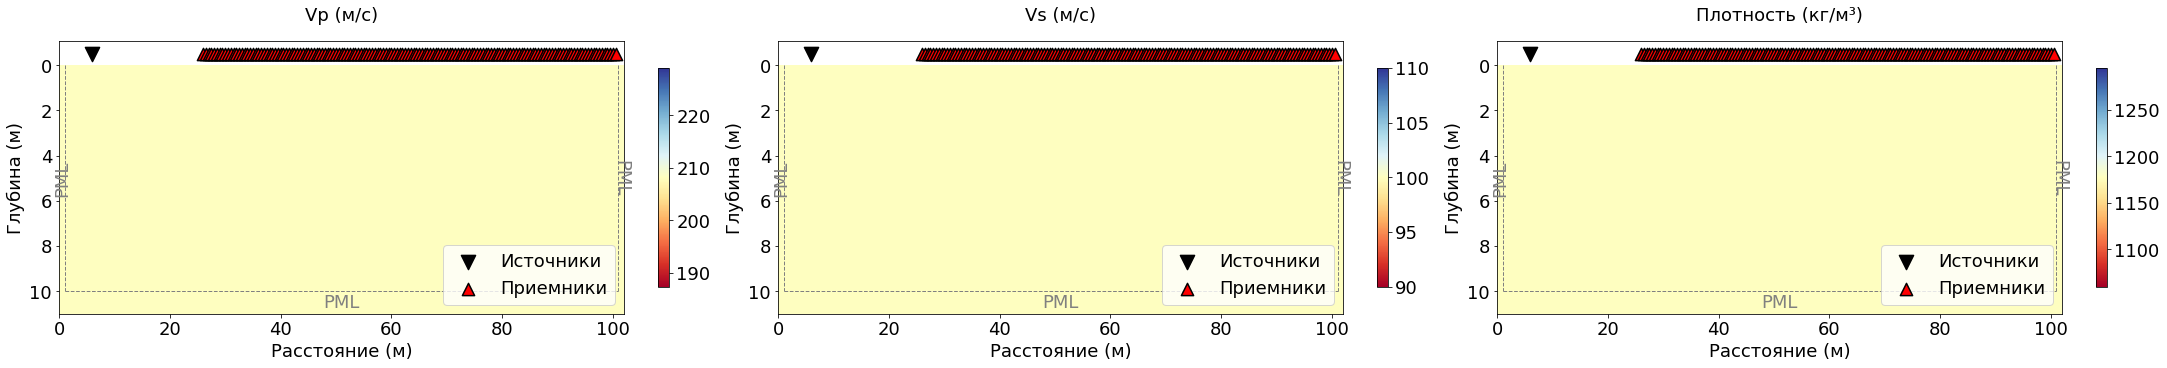

Time elapsed: 53.4s (0m 53.4s)
frequency: 15


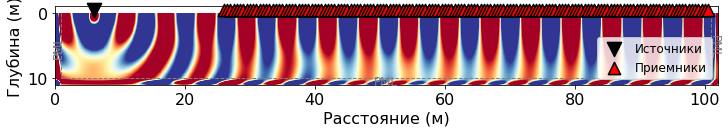

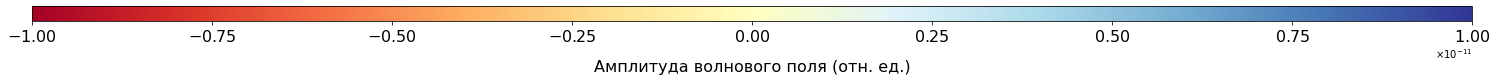

frequency: 20


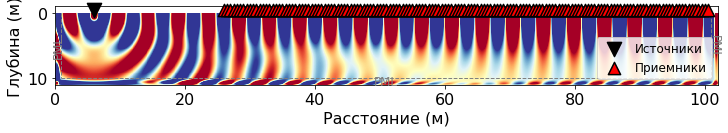

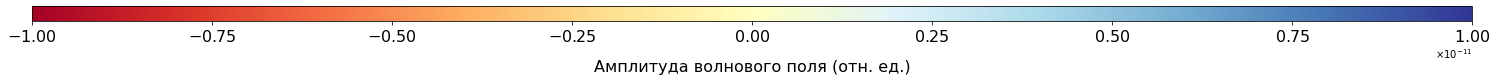

frequency: 25


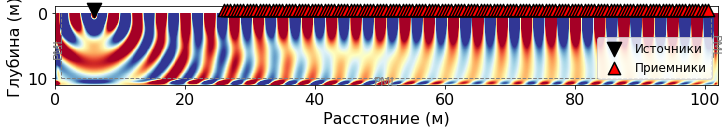

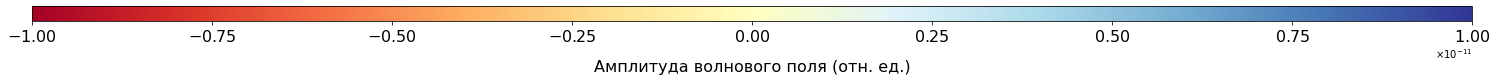

In [3]:
# preparation of a reference model
vp, vs, rho, qp, qs = ut.prepare_referent_model(nz, nx, vs_ref, puasson_ref, qp_ref, qp_ref/2, nfreq)

# Surface waves eigen function calculation
depth = np.arange(0, z, h)
eig_data = eigenfunctions_solver(0, frequencies, vs[:nz-npml,0], vp[:nz-npml,0], rho[:nz-npml,0], np.diff(depth))

# drawing of a reference model
ut.draw_models(vp, vs, rho, x, z, pml, sou=[soux, souy-h*10],  rec=[recx, recy-h*10], signature_language="ru")

# calculation elastic equation
fd_data  = solve_multi_frequency_elastic(frequencies, vp, vs, qp, qs, rho, nx, nz, h, npml, souy, soux, ampl_sou)

# drawing of a snapshot
for f_i in range(nfreq):
    print("frequency:", frequencies[f_i])
    ut.draw_real_snapshots(fd_data[0][f_i], x, z, pml, scale = 1e-11, 
                           sou=[soux, souy-h*10], rec=[recx, recy-h*10], 
                           fontsize=16, figsize=(10, 5), title="", signature_language = "ru")

frequency:  15


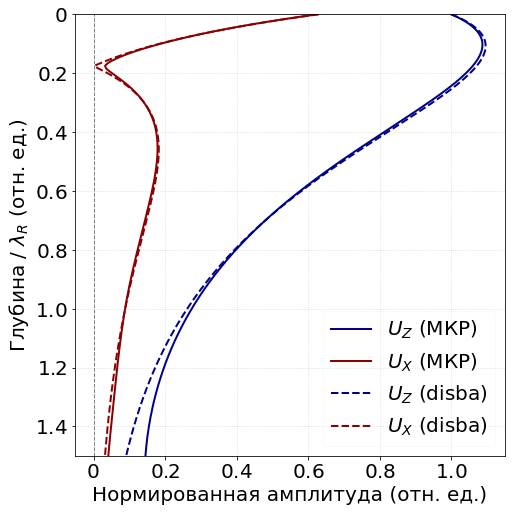

frequency:  20


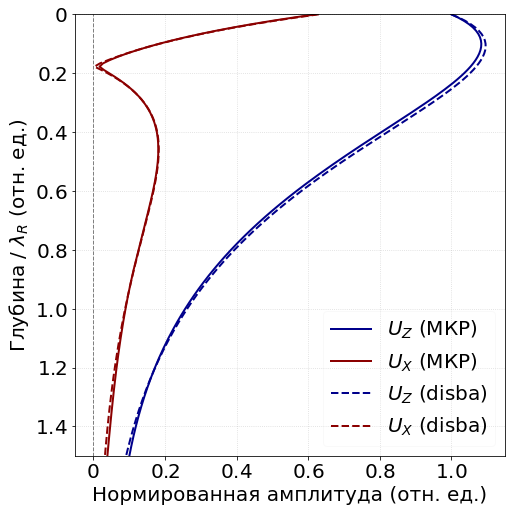

frequency:  25


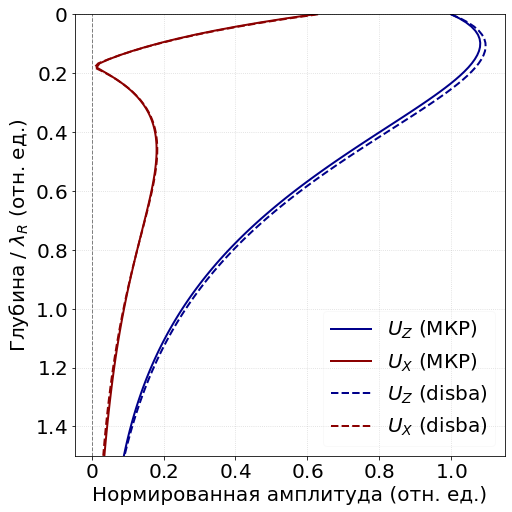

In [4]:
for f_i in range(len(frequencies)):
    print("frequency: ", frequencies[f_i])
    l = vs[0,0]*0.9 / frequencies[f_i]
    ind_depth = np.where(depth / l <= 1.5)[0]
    fd_zz = np.mean(np.abs(fd_data[0][f_i][:nz-npml, np.int32(recx/h)]), axis=1)[ind_depth]
    fd_zx = np.mean(np.abs(fd_data[1][f_i][:nz-npml, np.int32(recx/h)]), axis=1)[ind_depth]
    eig_zz = np.abs(eig_data[0][f_i])[ind_depth]
    eig_zx = np.abs(eig_data[1][f_i])[ind_depth]
    ut.plot_wavefield_components([fd_zz/fd_zz[0], fd_zx/fd_zz[0]],
                                 [eig_zz/eig_zz[0], eig_zx/eig_zz[0]], 
                                 depth=depth[ind_depth]/l, figfilename = "figures/" + 'fig_1_'+str(f_i+1), 
                                 signature_language = "ru")